**Dataset: Released by the two wheeler ride hailing company rapido.**
### Data Analysis and finding insights from the data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
df=pd.read_excel('Rapido Data Analyst Assignment DataSet (1).xlsx')

In [4]:
df.head()

,trip_id,customer_id,timestamp,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare
0,ID001,CUST_001,1546709270211,17.442705,78.387878,17.457829,78.399056,2.806,12.609667,37
1,ID002,CUST_002,1546709309524,17.490189,78.415512,17.450548,78.367294,11.991,24.075200,119
2,ID003,CUST_003,1546709331857,17.370108,78.515045,17.377041,78.517921,1.322,8.708300,27
3,ID004,CUST_004,1546709358403,17.439314,78.443001,17.397131,78.516586,11.822,24.037550,121
4,ID005,CUST_005,1546709386884,17.432325,78.381966,17.401625,78.400032,6.978,16.120867,58


We'll convert timestamp to understandable time format to gather inference in the analysis process.

In [145]:
import time
import datetime
from datetime import timedelta
df['timestamp'] = df['timestamp'].apply(lambda d: time.strftime('%m/%d/%Y %H:%M:%S',  time.gmtime(d/1000.)))

In [217]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

#### Looking for anomalies in the data:

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pick_lat,44587.0,17.427919,0.030049,17.330339,17.405327,17.432136,17.446777,17.529791
pick_lng,44587.0,78.435542,0.053333,78.308258,78.386562,78.438866,78.480839,78.600647
drop_lat,44587.0,17.427891,0.037722,12.921696,17.405660,17.431213,17.446907,17.736155
drop_lng,44587.0,78.434897,0.054965,77.548103,78.385010,78.438164,78.480255,78.634804
travel_distance,44587.0,5.094359,3.365008,-1.000000,2.744500,4.299000,6.679500,52.801000
travel_time,44587.0,15.819835,23.462865,0.022750,8.428525,13.126250,20.111167,4134.388700
trip_fare,44587.0,53.872833,33.430462,20.000000,36.000000,46.000000,60.000000,1670.000000


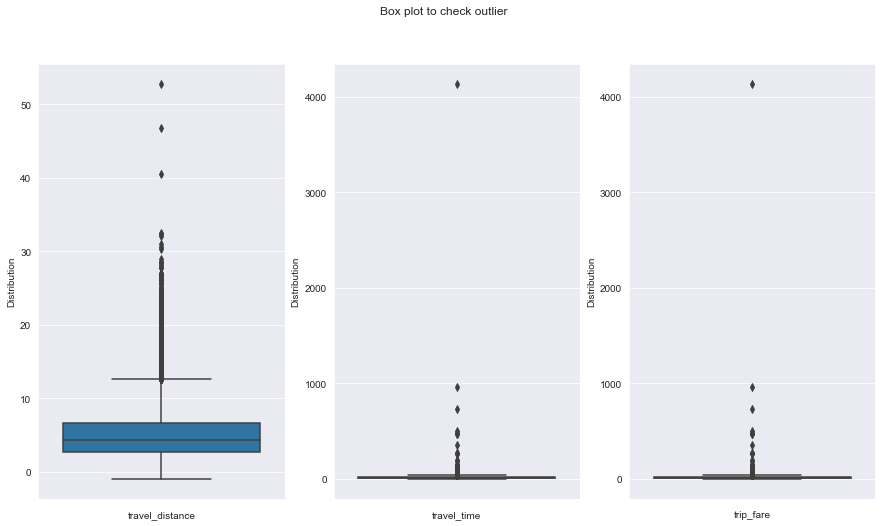

In [23]:
f, axes = plt.subplots(1, 3, figsize=(15,8))
sns.set_style("darkgrid")
t = f.suptitle('Box plot to check outlier', fontsize=12)


sns.boxplot(y="travel_distance", data=df, ax=axes[0])
sns.boxplot(y="travel_time", data=df, ax=axes[1])
sns.boxplot(y="travel_time", data=df, ax=axes[2])

axes[0].set(xlabel="travel_distance",ylabel='Distribution')
axes[1].set(xlabel="travel_time",ylabel='Distribution')
axes[2].set(xlabel="trip_fare",ylabel='Distribution')


plt.show()

***Will have to remove the outlier in travel time, trip fare and we can see travel distance goin in the negative zone. Hence All these data points collected from the apps are having error hence have to be removed.***

Checking Null Values:

In [8]:
df.isna().sum()

trip_id            0
customer_id        0
timestamp          0
pick_lat           0
pick_lng           0
drop_lat           0
drop_lng           0
travel_distance    0
travel_time        0
trip_fare          0
dtype: int64

In [146]:
df=df[~(df['travel_distance']<0)]
df=df[~((df['travel_time']>150) & (df['travel_distance']<0.600))]

**Deleting ambigous trips with inconsistency in distance and time.**

In [64]:
df[~(df['trip_fare']==959)] #seems like an error, for a very small trip 959 rs charged

,trip_id,customer_id,timestamp,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare
26722,ID26723,CUST_11066,1546853008950,17.430353,78.406220,17.432350,78.449013,4.0,10.143917,959
27304,ID27305,CUST_2196,1546858611537,17.404274,78.492340,17.411062,78.493576,2.7,10.949667,959
36239,ID36240,CUST_6416,1546699878502,17.397224,78.480911,17.428328,78.450958,1.0,1.596217,959


In [147]:
df=df[~(df['trip_fare']==959)]
df=df[~(df['travel_time']>700)]

## We'll start with descriptive analytics and move forward toward inferential analytics. Insights and code comments will be found through out the notebook.

Total number of trips completed:

In [67]:
df.size

445780

Total number of customers associated:

In [69]:
df['customer_id'].nunique()

19136

Top Customers:

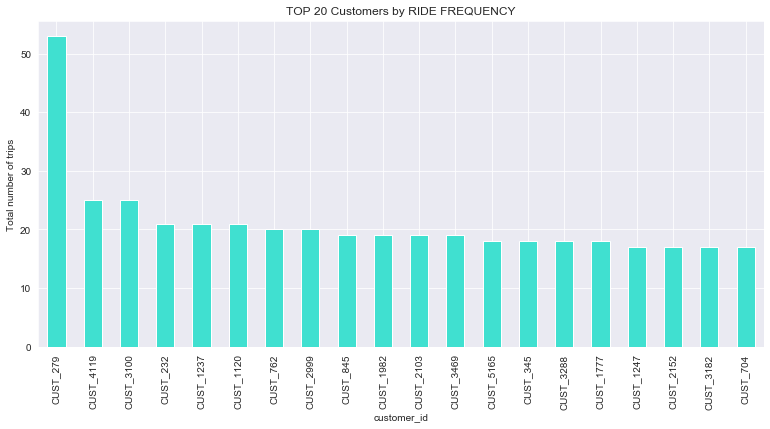

In [90]:
plt.figure(figsize=(13, 6))
df.groupby('customer_id').count().sort_values(by='trip_id',ascending=False)['trip_id'].head(20).plot.bar(color='turquoise')
plt.ylabel('Total number of trips')
plt.title("TOP 20 Customers by RIDE FREQUENCY")
plt.show()

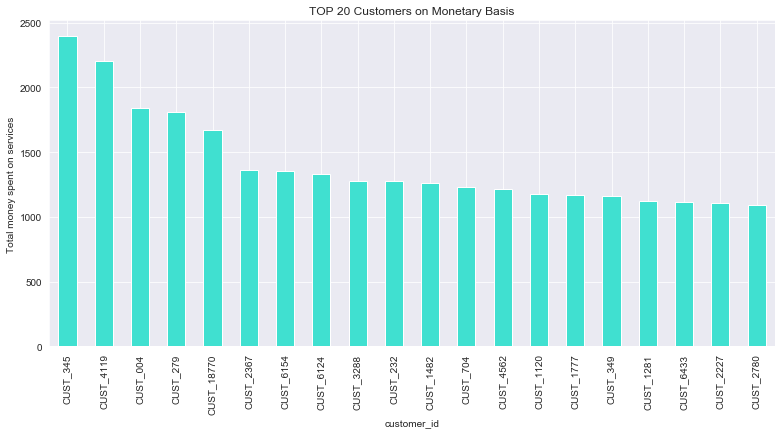

In [91]:
plt.figure(figsize=(13, 6))
df.groupby('customer_id').sum().sort_values(by='trip_fare',ascending=False)['trip_fare'].head(20).plot.bar(color='turquoise')
plt.ylabel('Total money spent on services')
plt.title("TOP 20 Customers on Monetary Basis")
plt.show()

**Distribution of travel distance to understand the majority range of distance Rapido is preferred:**

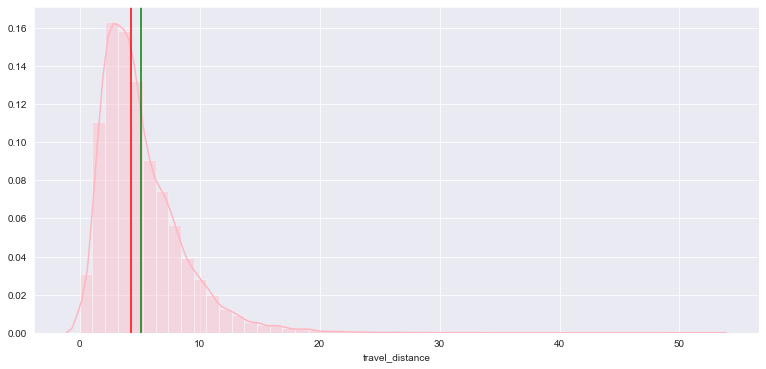

Mean: 5.095215900933212
Median: 4.3


In [94]:
plt.figure(figsize=(13, 6))
sns.distplot(df['travel_distance'],color='lightpink')
plt.axvline(df['travel_distance'].mean(),color='g',label='mean')
# create a red line plot for median  on the density plot:
plt.axvline(df['travel_distance'].median(),color='r',label='mean')
plt.show()
print('Mean:',df['travel_distance'].mean())
print('Median:',df['travel_distance'].median())

#### Checking distribution of number of trips by a customer:

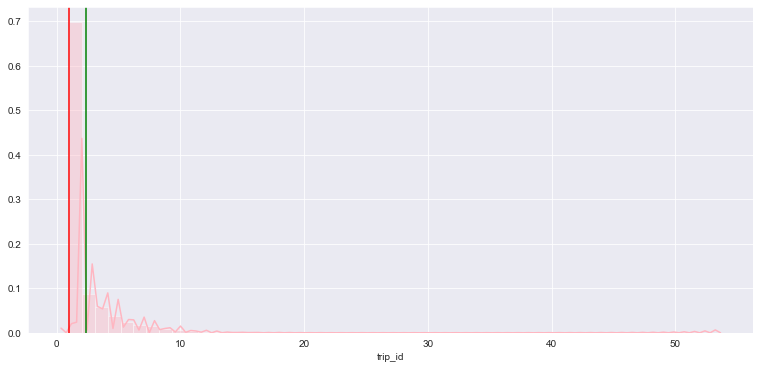

Mean: 2.3296749242186685
Median: 1.0


In [97]:
z=df.groupby('customer_id').count().sort_values(by='trip_id',ascending=False)['trip_id']
plt.figure(figsize=(13, 6))
sns.distplot(z,color='lightpink')
plt.axvline(z.mean(),color='g',label='mean')
# create a red line plot for median  on the density plot:
plt.axvline(z.median(),color='r',label='mean')

plt.show()
print('Mean:',z.mean())
print('Median:',z.median())

**As we can see Median is 1, we can understand people used the app just for first free ride. Checking the percentage of un-returned user. These customers used the app just because of discount. Different market strategy can be plotted for this set of customer. Checking percentage of such customers:**

In [108]:
z[z==1].sum()/z.shape[0]*100 #52% of the total customers. 

52.29957144350371

***This can be a metric to evaluate the product in longer run also***

Checking intra correlation:

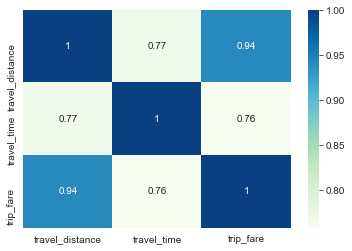

In [120]:
corr = df[['travel_distance','travel_time','trip_fare']].corr()
sns.heatmap(corr,annot=True,cmap='GnBu')

The reason for such high correlation between travel_time and trip fare is because sometimes the ride wasnt marked completed and calculated as travel time. Such instances where travel time is 300-600(5-11hrs) mins is because of the same error possibly.

**Analysis on the basis of TIME:**

#### As we figured out 2019 january of first week. We'll check for busiest week and busiest time in day.

In [158]:
df_time=df.copy()
df_time['day']=pd.DatetimeIndex(df['timestamp']).day

In [163]:
df_time['day']=df_time['day'].replace({1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun',7:'Mon'})

In [164]:
df_time.groupby('day').count()['trip_id']

day
Fri    8511
Mon    8784
Sat    6854
Sun    4574
Thu    8034
Tue      54
Wed    7765
Name: trip_id, dtype: int64

**We'll remove Tue because of incorrect sampling. Tue will not be able to represent true value of rapido trips on tuesday**

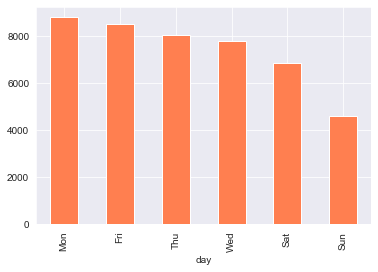

In [175]:
z=df_time.copy()
z=z[~(z['day']=='Tue')]
(z.groupby('day').count()['trip_id']).sort_values(ascending=False).plot(kind='bar',color='coral')
plt.show()

***Monday is the busiest day and Sunday is the least busiest day. This data can be used to infer that rapido is used on working days more because it is a cheaper mode of transport.***

**We'll bucket time of the day in segments of one hour each and analyse peak hours:**

In [181]:
timeslot=pd.Series(pd.DatetimeIndex(df['timestamp']).hour).value_counts(normalize=True)*100

In [194]:
timeofday=['Early-Morning','Morning','Mid-day','Evening/Night','Late Night']
value=[]
value.append(timeslot[[3,4,5,6]].sum())
value.append(timeslot[[7,8,9,10,11]].sum())
value.append(timeslot[[12,13,14,15,16]].sum())
value.append(timeslot[[17,18,19,20,21]].sum())
value.append(timeslot[[22,23,0,1,2]].sum())

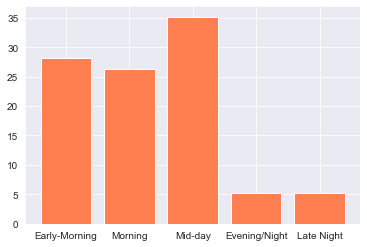

In [198]:
plt.bar(timeofday,value,color='coral')
plt.show()

***Mid-day,Early-Morning and Morning are the peak hours. Which is a major insight for the company***

*Another important metric that can be used for product evaluation is **Average time between first two trips**. If the company is able to keep the metric consistent it is a neutral sign. If the mean is coming down, it is a sign of increased frequency of use and the other way round can be 2 possibilities: 1) Less frequent usage of product 2) Sign of returning users. Users returning after a long time will be outliers to this data and increase the mean hence analysis have to be done accordingly.*

In [230]:
a=df.groupby('customer_id').count()['trip_id']
a=a[a>1]
imp_users=a.index

In [231]:
l=[]
for i in imp_users:
    date1 = df[df['customer_id']==i].sort_values(by='timestamp',ascending=True).head(2).iloc[0]['timestamp']
    date2 = df[df['customer_id']==i].sort_values(by='timestamp',ascending=True).head(2).iloc[1]['timestamp']
    l.append(date2-date1)

In [233]:
print('Current average time between first two trips:',np.mean(l))

Current average time between first two trips: 1 days 00:46:52.424126


In [ ]:
l=pd.DataFrame(l,columns=['delta'])

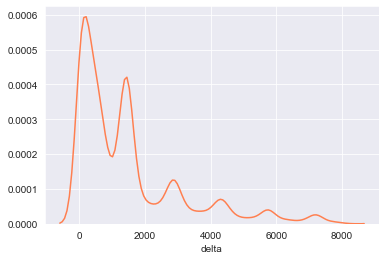

In [244]:
sns.distplot(l['delta'].astype('timedelta64[m]'), hist=False,color='coral')
plt.show()

***The distribution of time difference metric in minutes. The graph is very unique but a poisitive sign as majority returning customers are at the lower end which means the user is using the product again in some time, this could be because of a return trip also***